<a href="https://colab.research.google.com/github/leesujin1209/BlockChain/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 K-최근접 이웃 회귀


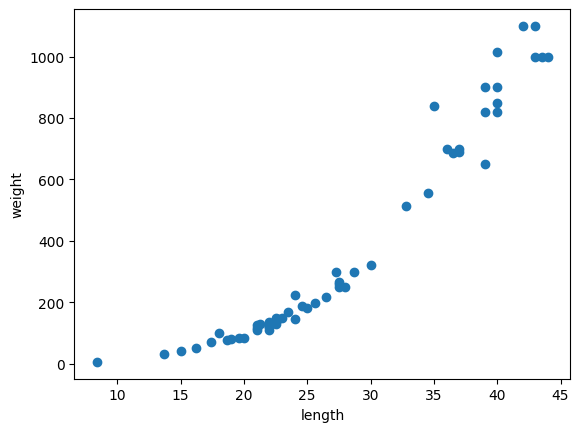

In [ ]:
# 농어의 길이는 특성, 무게는 타깃
# https://gist.github.com/rickiepark/2cd82455e985001542047d7d55d50630

import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 산점도 출력

In [ ]:
# 훈련 세트 준비

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# print(train_input)
# print(test_input)

# train_input = train_input.reshape(42, 1)     # 42행 1열로 만들라는 말
# train_input = train_input.reshape(21, 2)     # 21행 2열로 만들라는 말
# train_input = train_input.reshape(-1, 2)     # -1은 알아서 바꾸라는 말
# print(train_input)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
knr.fit(train_input, train_target)
knr.score(test_input, test_target)
knr.score(train_input, train_target)



0.9698823289099254

무게가 기준이 되어야함


넘파이 배열의 모양을 변경하는 거: reshape

K 최근점 분류는
0이냐 1이냐를 물어보기 때문에: 정확도

분류의 경우 정확도는 테스트 셋 전체에서 샘플을 정확하게 맞추냐 안맞추냐이다.


**결정 계수 = 정확도와 같이 비슷하게 나오도록 수치화를 맞췄음**

R^2 = 1- (타깃-예측)^2의 합 / (타깃-평균)^2의 합

타깃을 많이 맞춰서 값이 적으면 1에 수렴
타깃을 많이 맞추지 못해서 값이 많으면 0에 수렴

그러므로 정확도와 수치화가 맞음!

타깃 = 예측 이라면 결정계수가 1이 되고

최적 타깃과 예측의 차이가 벌어지면 1보다 점점 적어짐


## 3.2 과대적합과 과소적합



*   과대적합: 훈련세트 (결정계수)정확도 > 테스트 세트 정확도
*   과소적합: 훈련세트 (결정계수)정확도 < 테스트 세트 정확도




[275.] [921.66666667]


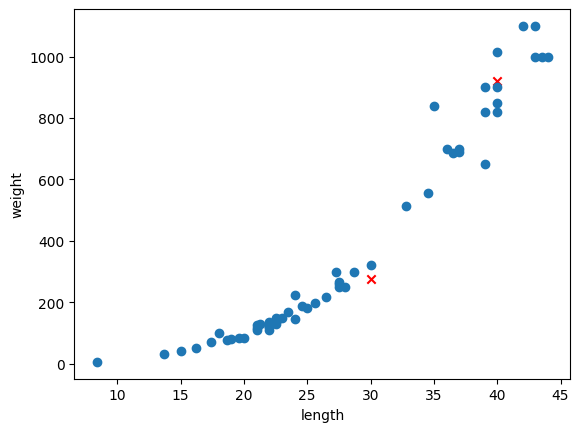

In [ ]:
# 이웃 개수 줄이기

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3         # 기본값: 5  이웃의 개수( = k)를 줄이면 극소에 예민해짐             = 과대적합
                            #                                늘리면 전반에 일반적인 패턴을 따름 = 과소적합

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
knr.fit(train_input, train_target)


# 30,275와 40,921을 산점도에 표시
print(knr.predict([[30]]), knr.predict([[40]]))

plt.scatter([30], [275], marker='x', c='red')
plt.scatter([40], [921], marker='x', c='red')

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어의 길이에 따른 무게 예측


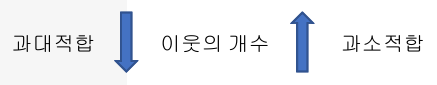